In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav")

<Response [403]>

In [ ]:
# Request 403 -> Bad request
# Server reject your request

In [ ]:
requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav").text
# As you can see "access denied below"

'<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "http&#58;&#47;&#47;www&#46;ambitionbox&#46;com&#47;list&#45;of&#45;companies&#63;" on this server.<P>\nReference&#32;&#35;18&#46;cff53017&#46;1766427438&#46;b79fb1d8\n<P>https&#58;&#47;&#47;errors&#46;edgesuite&#46;net&#47;18&#46;cff53017&#46;1766427438&#46;b79fb1d8</P>\n</BODY>\n</HTML>\n'

In [ ]:
# If i am directly accessing this website the website things of me as a boat and denied my permission
# so i have to disguise myself as a human being to hit the website
# for this well use a piece of code named header

In [7]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage = requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav",headers=headers).text

In [ ]:
soup = BeautifulSoup(webpage,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="/assets/next/manifest.json" rel="manifest"/>
  <style>
   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}
  </style>
  <script defer="" src="/static/js/env-runtime.js">
  </script>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()
  </script>
  <script>
   window.Prism=window.Prism||{},window.Prism.manual=!0
  </script>
  <title>
   Top Featured Companies in India | AmbitionBox
  </title>
  <meta content="2025 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="
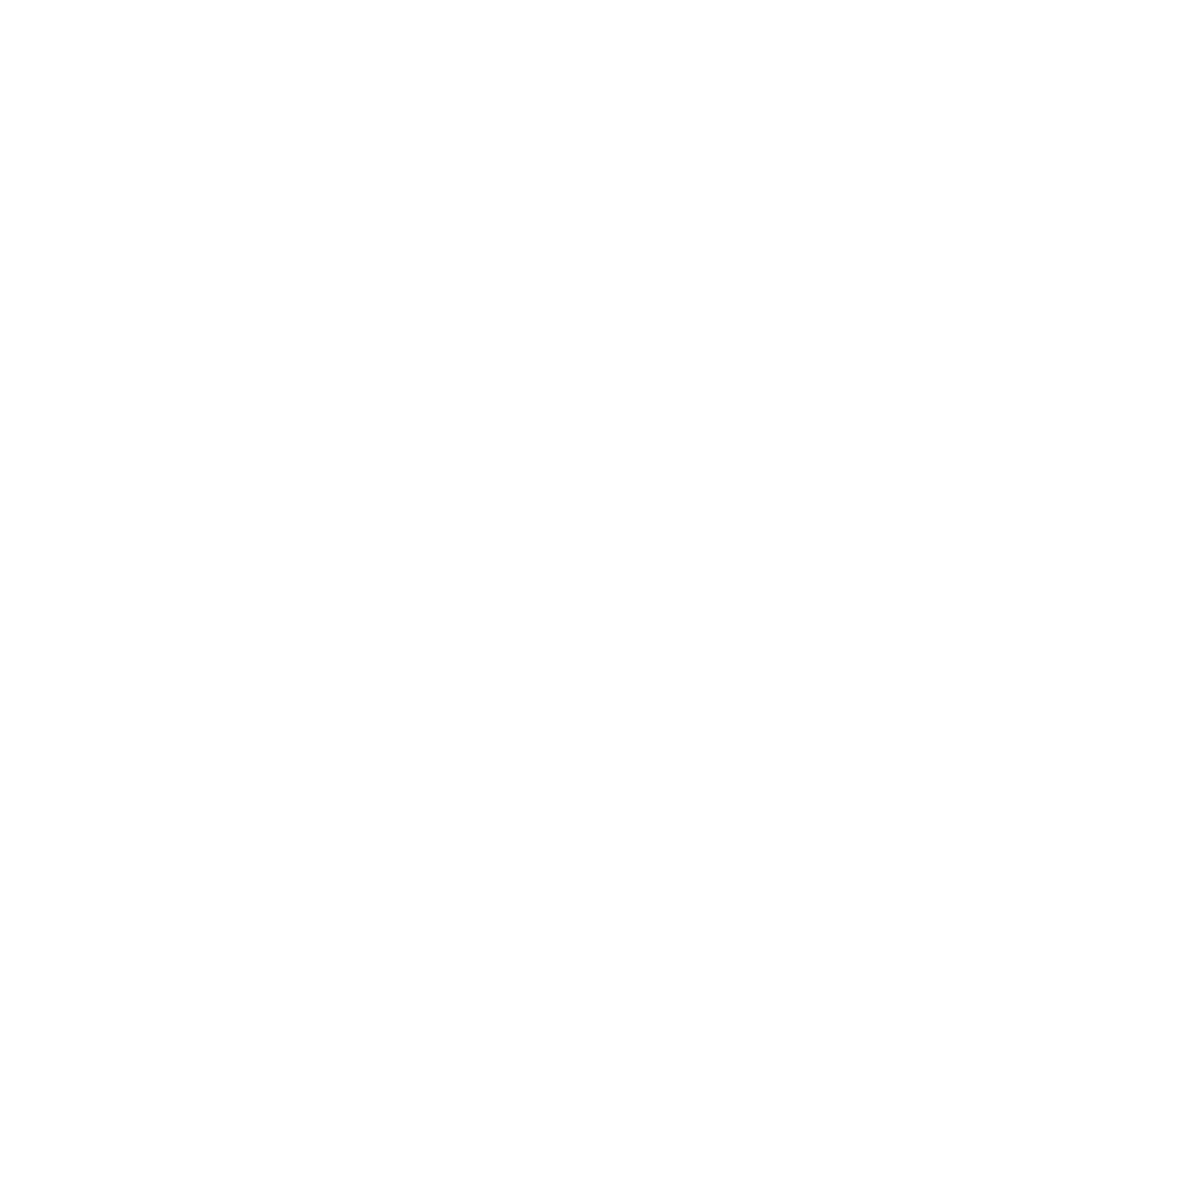

In [9]:
print(soup.prettify())

### Below code is just to show how things work, we use different approach for actual work

In [ ]:
# To extract all h1 tags from webpage
soup.find_all('h1')

[<h1 class="companyListing__title">
 							Featured Companies in India
 						</h1>]

In [ ]:
# To extract text inside the tag
soup.find_all('h1')[0].text.strip()
# we use strip to remove all special characters(speces,tab,etc)

'Featured Companies in India'

In [16]:
soup.find_all('h2')

[<h2 class="companyCardWrapper__companyName" title="HCLTech">
 									HCLTech
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="iEnergizer">
 									iEnergizer
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="IDFC FIRST Bank">
 									IDFC FIRST Bank
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="IndusInd Bank">
 									IndusInd Bank
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="Bandhan Bank">
 									Bandhan Bank
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="Asian Paints">
 									Asian Paints
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="Paytm">
 									Paytm
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="Equitas Small Finance Bank">
 									Equitas Small Finance Bank
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="Wells Fargo">
 									Wells Fargo
 								</h2>,
 <h2 class="companyCardWrapper__companyN

In [17]:
# To extract text inside the tag
# since its a list we can calculate its length
len(soup.find_all('h2'))

23

In [19]:
for i in soup.find_all('h2'):
    print(i.text.strip())

HCLTech
iEnergizer
IDFC FIRST Bank
IndusInd Bank
Bandhan Bank
Asian Paints
Paytm
Equitas Small Finance Bank
Wells Fargo
Lupin
Tata Projects
Coforge
Muthoot Finance
Udaan
BigBasket
PolicyBazaar
Motilal Oswal Financial Services
Lenskart
DCB Bank
Publicis Sapient
Popular Collections by Industries
Popular Collections by Cities
Popular Collections by Roles


In [ ]:
# We can also use class along with tags to specify a specific data
# for ex if we want rating of tcs
len(soup.find_all('div',class_='rating_text'))

20

In [29]:
for i in soup.find_all('div',class_='rating_text'):
    print(i.text.strip())

3.4
4.6
3.9
3.4
3.7
3.9
3.2
4.4
3.7
4.1
4.2
3.2
3.7
3.9
3.9
3.7
3.7
3.3
3.8
3.4


In [40]:
# For reviews
len(soup.find_all('span',class_="companyCardWrapper__companyRatingCount"))

20

In [41]:
for i in soup.find_all('span',class_="companyCardWrapper__companyRatingCount"):
    print(i.text.strip())

(44.2k)
(27.3k)
(13.8k)
(13.7k)
(10.5k)
(9.2k)
(9.1k)
(8.4k)
(8.2k)
(7.2k)
(6.6k)
(6.4k)
(6.1k)
(5.8k)
(5.6k)
(5.4k)
(4.3k)
(4.2k)
(3.9k)
(3.8k)


### **Actual work**

In [ ]:
# why not pick up the whole container of a single company


In [ ]:
company = soup.find_all('div',class_='companyCardWrapper')

In [44]:
len(company)

20

In [ ]:
name = []
rating = []
reviews = []
reviews1 = []
salaris = []
interviews = []
jobs = []
benefits = []
photos = []
for i in company:
    name.append(i.find('h2').text.strip())
    rating.append(i.find('div',class_='rating_text').text.strip())
    reviews.append(i.find('span',class_="companyCardWrapper__companyRatingCount").text.strip())
    reviews1.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[0].text.strip())
    salaris.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[1].text.strip())
    interviews.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[2].text.strip())
    jobs.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[3].text.strip())
    benefits.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[4].text.strip())
    photos.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[5].text.strip())
    

In [93]:
name

['HCLTech',
 'iEnergizer',
 'IDFC FIRST Bank',
 'IndusInd Bank',
 'Bandhan Bank',
 'Asian Paints',
 'Paytm',
 'Equitas Small Finance Bank',
 'Wells Fargo',
 'Lupin',
 'Tata Projects',
 'Coforge',
 'Muthoot Finance',
 'Udaan',
 'BigBasket',
 'PolicyBazaar',
 'Motilal Oswal Financial Services',
 'Lenskart',
 'DCB Bank',
 'Publicis Sapient']

In [95]:
rating

['3.4',
 '4.6',
 '3.9',
 '3.4',
 '3.7',
 '3.9',
 '3.2',
 '4.4',
 '3.7',
 '4.1',
 '4.2',
 '3.2',
 '3.7',
 '3.9',
 '3.9',
 '3.7',
 '3.7',
 '3.3',
 '3.8',
 '3.4']

In [96]:
reviews

['(44.2k)',
 '(27.3k)',
 '(13.8k)',
 '(13.7k)',
 '(10.5k)',
 '(9.2k)',
 '(9.1k)',
 '(8.4k)',
 '(8.2k)',
 '(7.2k)',
 '(6.6k)',
 '(6.4k)',
 '(6.1k)',
 '(5.8k)',
 '(5.6k)',
 '(5.4k)',
 '(4.3k)',
 '(4.2k)',
 '(3.9k)',
 '(3.8k)']

In [97]:
reviews1

['44.2k',
 '27.3k',
 '13.8k',
 '13.7k',
 '10.5k',
 '9.2k',
 '9.1k',
 '8.4k',
 '8.2k',
 '7.2k',
 '6.6k',
 '6.4k',
 '6.1k',
 '5.8k',
 '5.6k',
 '5.4k',
 '4.3k',
 '4.2k',
 '3.9k',
 '3.8k']

In [98]:
salaris

['3.7L',
 '24.1k',
 '49.1k',
 '51.2k',
 '25.6k',
 '24.5k',
 '33.3k',
 '13.3k',
 '55.6k',
 '22.4k',
 '22.1k',
 '47.9k',
 '12.8k',
 '15.8k',
 '19k',
 '17k',
 '12.8k',
 '12.9k',
 '9.6k',
 '30.5k']

In [99]:
interviews

['4.4k',
 '979',
 '876',
 '737',
 '703',
 '806',
 '864',
 '732',
 '670',
 '430',
 '566',
 '667',
 '328',
 '365',
 '459',
 '584',
 '534',
 '423',
 '222',
 '680']

In [101]:
jobs

['246',
 '64',
 '47',
 '157',
 '7',
 '38',
 '607',
 '23',
 '88',
 '52',
 '32',
 '117',
 '36',
 '4',
 '104',
 '467',
 '66',
 '123',
 '11',
 '259']

In [102]:
benefits

['3.8k',
 '430',
 '695',
 '793',
 '517',
 '884',
 '582',
 '397',
 '855',
 '764',
 '540',
 '273',
 '325',
 '755',
 '380',
 '231',
 '167',
 '199',
 '248',
 '391']

In [103]:
photos

['63',
 '28',
 '71',
 '15',
 '39',
 '34',
 '24',
 '32',
 '13',
 '11',
 '48',
 '102',
 '8',
 '14',
 '33',
 '14',
 '90',
 '21',
 '23',
 '64']

### **Creating Dataset**

In [104]:
d = {'name':name,'rating':rating,'reviews':reviews,'reviews1':reviews1,'salaris':salaris,'interviews':interviews,'jobs':jobs,'benefits':benefits,'photos':photos}

In [105]:
pd.DataFrame(d)

,name,rating,reviews,reviews1,salaris,interviews,jobs,benefits,photos
0,HCLTech,3.4,(44.2k),44.2k,3.7L,4.4k,246,3.8k,63
1,iEnergizer,4.6,(27.3k),27.3k,24.1k,979,64,430,28
2,IDFC FIRST Bank,3.9,(13.8k),13.8k,49.1k,876,47,695,71
3,IndusInd Bank,3.4,(13.7k),13.7k,51.2k,737,157,793,15
4,Bandhan Bank,3.7,(10.5k),10.5k,25.6k,703,7,517,39
5,Asian Paints,3.9,(9.2k),9.2k,24.5k,806,38,884,34
6,Paytm,3.2,(9.1k),9.1k,33.3k,864,607,582,24
7,Equitas Small Finance Bank,4.4,(8.4k),8.4k,13.3k,732,23,397,32
8,Wells Fargo,3.7,(8.2k),8.2k,55.6k,670,88,855,13
9,Lupin,4.1,(7.2k),7.2k,22.4k,430,52,764,11


In [ ]:
# This is for the first page , for rest of pages

In [ ]:
final = pd.DataFrame()
for j in range(1,44):
    url = 'https://www.ambitionbox.com/list-of-companies?sortBy=popular&featuredCompanies=true&page={}'.format(j)
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    webpage = requests.get(url,headers=headers).text

    soup = BeautifulSoup(webpage,'lxml')
    company = soup.find_all('div',class_='companyCardWrapper')

    # name = []
    # rating = []
    # reviews = []
    # reviews1 = []
    # salaris = []
    # interviews = []
    # jobs = []
    # benefits = []
    # photos = []
    # for i in company:
    #     name.append(i.find('h2').text.strip())
    #     rating_tag = i.find('div', class_='rating_text')
    #     if rating_tag:
    #         rating.append(rating_tag.text.strip())
    #     else:
    #         rating.append("NA")
    #     reviews.append(i.find('span',class_="companyCardWrapper__companyRatingCount").text.strip())
    #     reviews1.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[0].text.strip())
    #     salaris.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[1].text.strip())
    #     interviews.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[2].text.strip())
    #     jobs.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[3].text.strip())
    #     benefits.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[4].text.strip())
    #     photos.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[5].text.strip())
    
    # *************************************************************************
    # THE LOWER CODE IS USED BECAUSE THE ABOVE DOES NOT HANDLE NAN(NULL) VALUES
    # *************************************************************************
    
    # Helper functions
    def get_text(tag, default="NA"):
        return tag.text.strip() if tag else default


    def get_action(actions, index, default="NA"):
        return actions[index].text.strip() if len(actions) > index else default


    # Initialize lists
    name = []
    rating = []
    reviews = []
    reviews1 = []
    salaris = []
    interviews = []
    jobs = []
    benefits = []
    photos = []

    # Scraping loop
    for i in company:
        # Company name
        name.append(get_text(i.find('h2')))

        # Rating
        rating.append(get_text(i.find('div', class_='rating_text')))

        # Reviews count
        reviews.append(
            get_text(i.find('span', class_="companyCardWrapper__companyRatingCount"))
        )

        # Action counts
        actions = i.find_all('span', class_='companyCardWrapper__ActionCount')

        reviews1.append(get_action(actions, 0))
        salaris.append(get_action(actions, 1))
        interviews.append(get_action(actions, 2))
        jobs.append(get_action(actions, 3))
        benefits.append(get_action(actions, 4))
        photos.append(get_action(actions, 5))

        
    d = {'name':name,'rating':rating,'reviews':reviews,'reviews1':reviews1,'salaris':salaris,'interviews':interviews,'jobs':jobs,'benefits':benefits,'photos':photos}

    df = pd.DataFrame(d)

    final=pd.concat([final,df],ignore_index=True)


In [113]:
final

,name,rating,reviews,reviews1,salaris,interviews,jobs,benefits,photos
0,HCLTech,3.4,(44.2k),44.2k,3.7L,4.4k,248,3.8k,63
1,iEnergizer,4.6,(27.3k),27.3k,24.1k,979,65,430,28
2,IDFC FIRST Bank,3.9,(13.8k),13.8k,49.1k,876,47,695,71
3,IndusInd Bank,3.4,(13.7k),13.7k,51.2k,737,157,793,15
4,Bandhan Bank,3.7,(10.5k),10.5k,25.6k,703,7,517,39
...,...,...,...,...,...,...,...,...,...
851,Dexcom,4.0,(1),1,8,3,10,--,--
852,Unipart Group,3.0,(1),1,25,--,--,--,--
853,ACV Auctions,NA,NA,--,25,--,6,--,--
854,MedRisk,NA,NA,--,6,--,7,--,--
